<a href="https://colab.research.google.com/github/KeiandraK/DS-Unit-2-Applied-Modeling/blob/master/Keiandra_King__assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [1]:
# Data Set 1
import pandas as pd
import numpy as np
causes_death=pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD')
causes_death.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [0]:
# Splitting data in to train and test 
from sklearn.model_selection import train_test_split
train, test = train_test_split(causes_death, train_size=0.80, test_size=0.20, 
                              random_state=42)

In [0]:
# Assign to X, y
target = 'Age-adjusted Death Rate'
features = causes_death.columns.drop('Age-adjusted Death Rate')

X_train = train[features]
y_train = train[target]

#X_val = val[features]
#y_val = val[target]

X_test = test[features]
y_test = test[target]

In [9]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8694, 5)
(8694,)
(2174, 5)
(2174,)


In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['Cause Name'], random_state=42)

In [0]:
X_val = val[features]
y_val = val[target]

In [16]:
print(X_val.shape)
print(y_val.shape)

(1739, 5)
(1739,)


In [19]:
!pip install category_encoders==2.*
!pip install pdpbox

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 57.7MB 39kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=db172e5e4c51dbf866f142095a2c7df248c74e070ea6a40f253bf1fbbbfa4a75
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


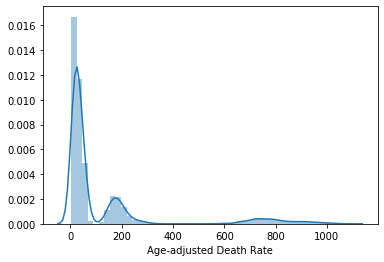

In [17]:
# The target has some right skew, but it's not too bad
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [20]:
#Linear Regression
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    # StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))


Linear Regression R^2 0.980177248706993


In [21]:
# Gradiant Boosting
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.9908020477232774


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example, example2])
for income in range(20000, 200000, 20000):
    examples['Deaths'] = deaths_causes
    preds = gb.predict(examples)
    for pred in preds:
        plt.scatter(deaths_causes, pred, color='grey')
    plt.scatter(income, np.mean(preds), color='red')
    plt.title('Partial Dependence')
    plt.xlabel('Deaths')
    plt.ylabel('Age-adjusted Death Rate')

NameError: ignored

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature = 'Deaths'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


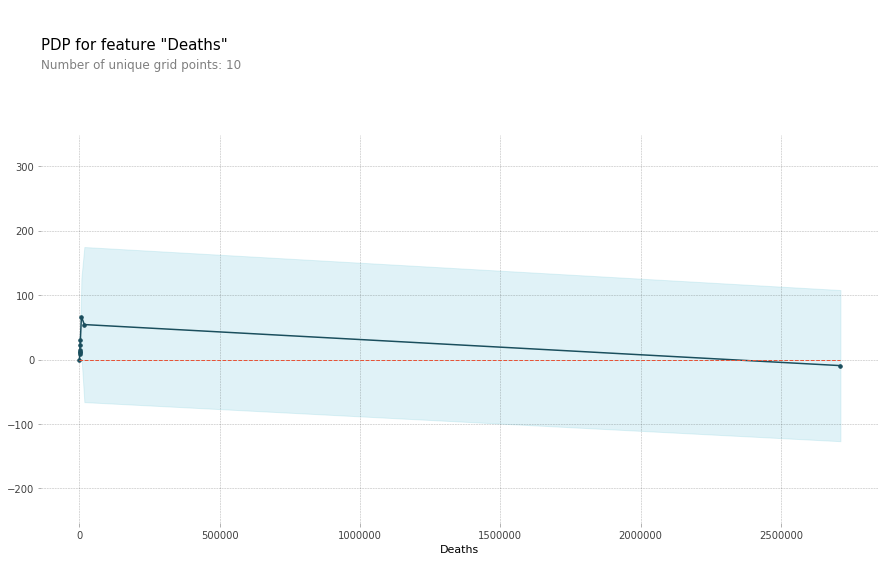

In [32]:
pdp_plot(isolated, feature_name=feature);

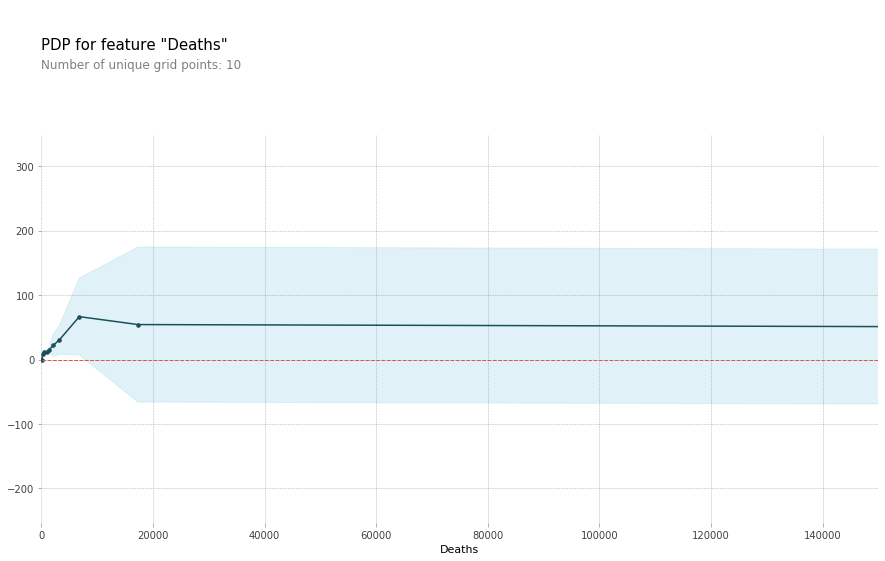

In [33]:
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,150000);

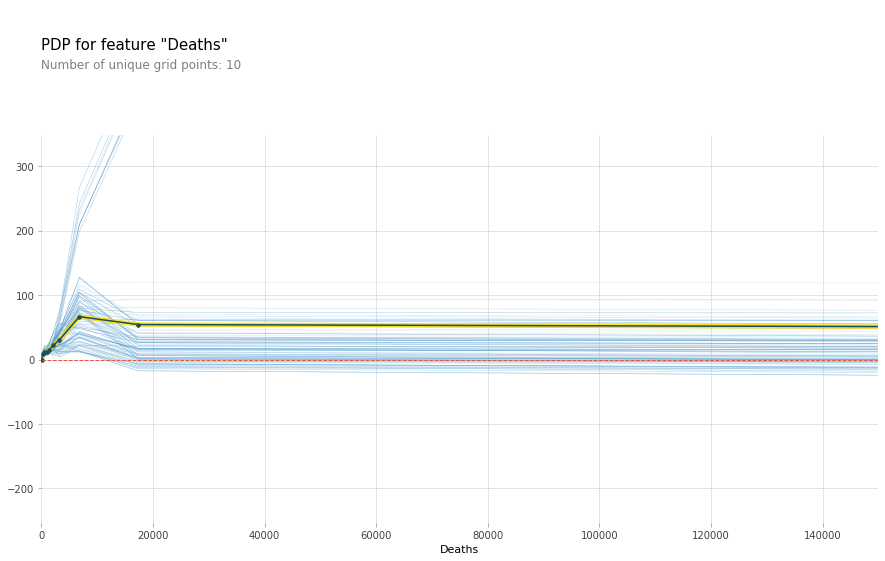

In [34]:
# Plot PDP with 100 ICE curves
# PDP: Partial Dependence Plot
# ICE: Individual Conditional Expectation
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
plt.xlim(0,150000);

In [35]:
# Number of predictions required to make a PDP with 1 feature
# given the size of your dataset, and the number of grid points:
len(X_val) * 10

17390

In [0]:
isolated = pdp_isolate(
    model=gb, 
    dataset=X_val,
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=50
)

In [37]:
# Number of predictions required to make a PDP with 1 feature
# given the size of your dataset, and the number of grid points:
len(X_val) * 50

86950

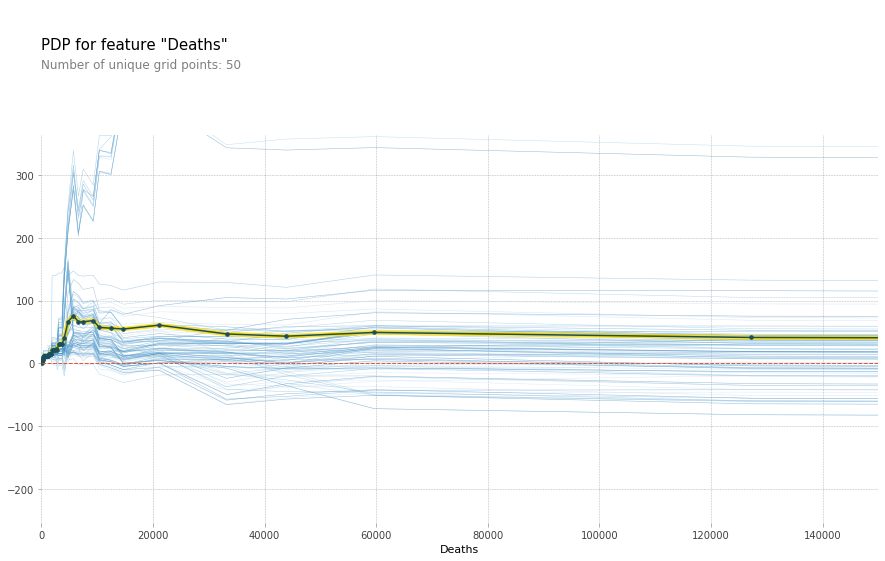

In [38]:
# Plot PDP with 100 ICE curves
# PDP: Partial Dependence Plot
# ICE: Individual Conditional Expectation
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
plt.xlim(0,150000);

In [0]:
# Partial Dependence Plots with 2 features
from pdpbox.pdp import pdp_interact, pdp_interact_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


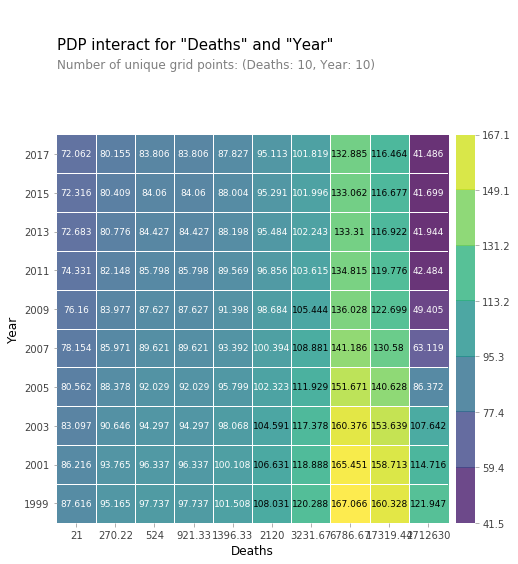

In [42]:
features = ['Deaths', 'Year']

interaction = pdp_interact(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [43]:
# Number of predictions required to make a PDP with 2 feature
# given the size of your dataset, and the number of grid points:
len(X_val) * 10**2

173900

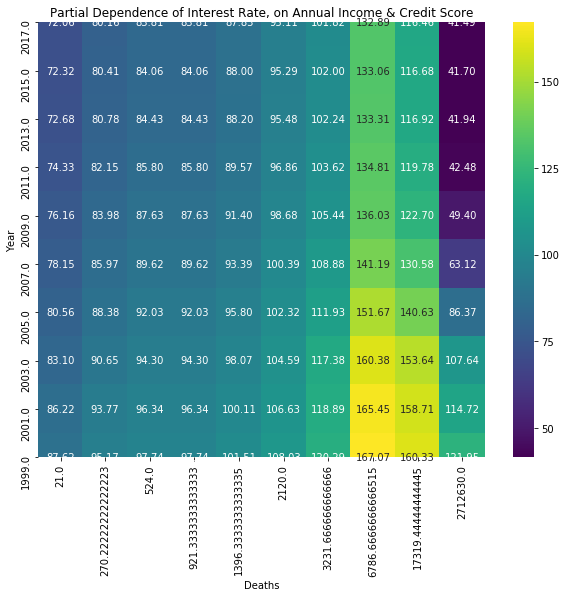

In [44]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence of Interest Rate, on Annual Income & Credit Score');

In [50]:
# Using Categorical Features
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
causes_death=pd.read_csv('https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD')
causes_death.head()


target = 'Cause Name'
features = causes_death.columns.drop(['Cause Name', '113 Cause Name'])

X = causes_death[features]
y = causes_death[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

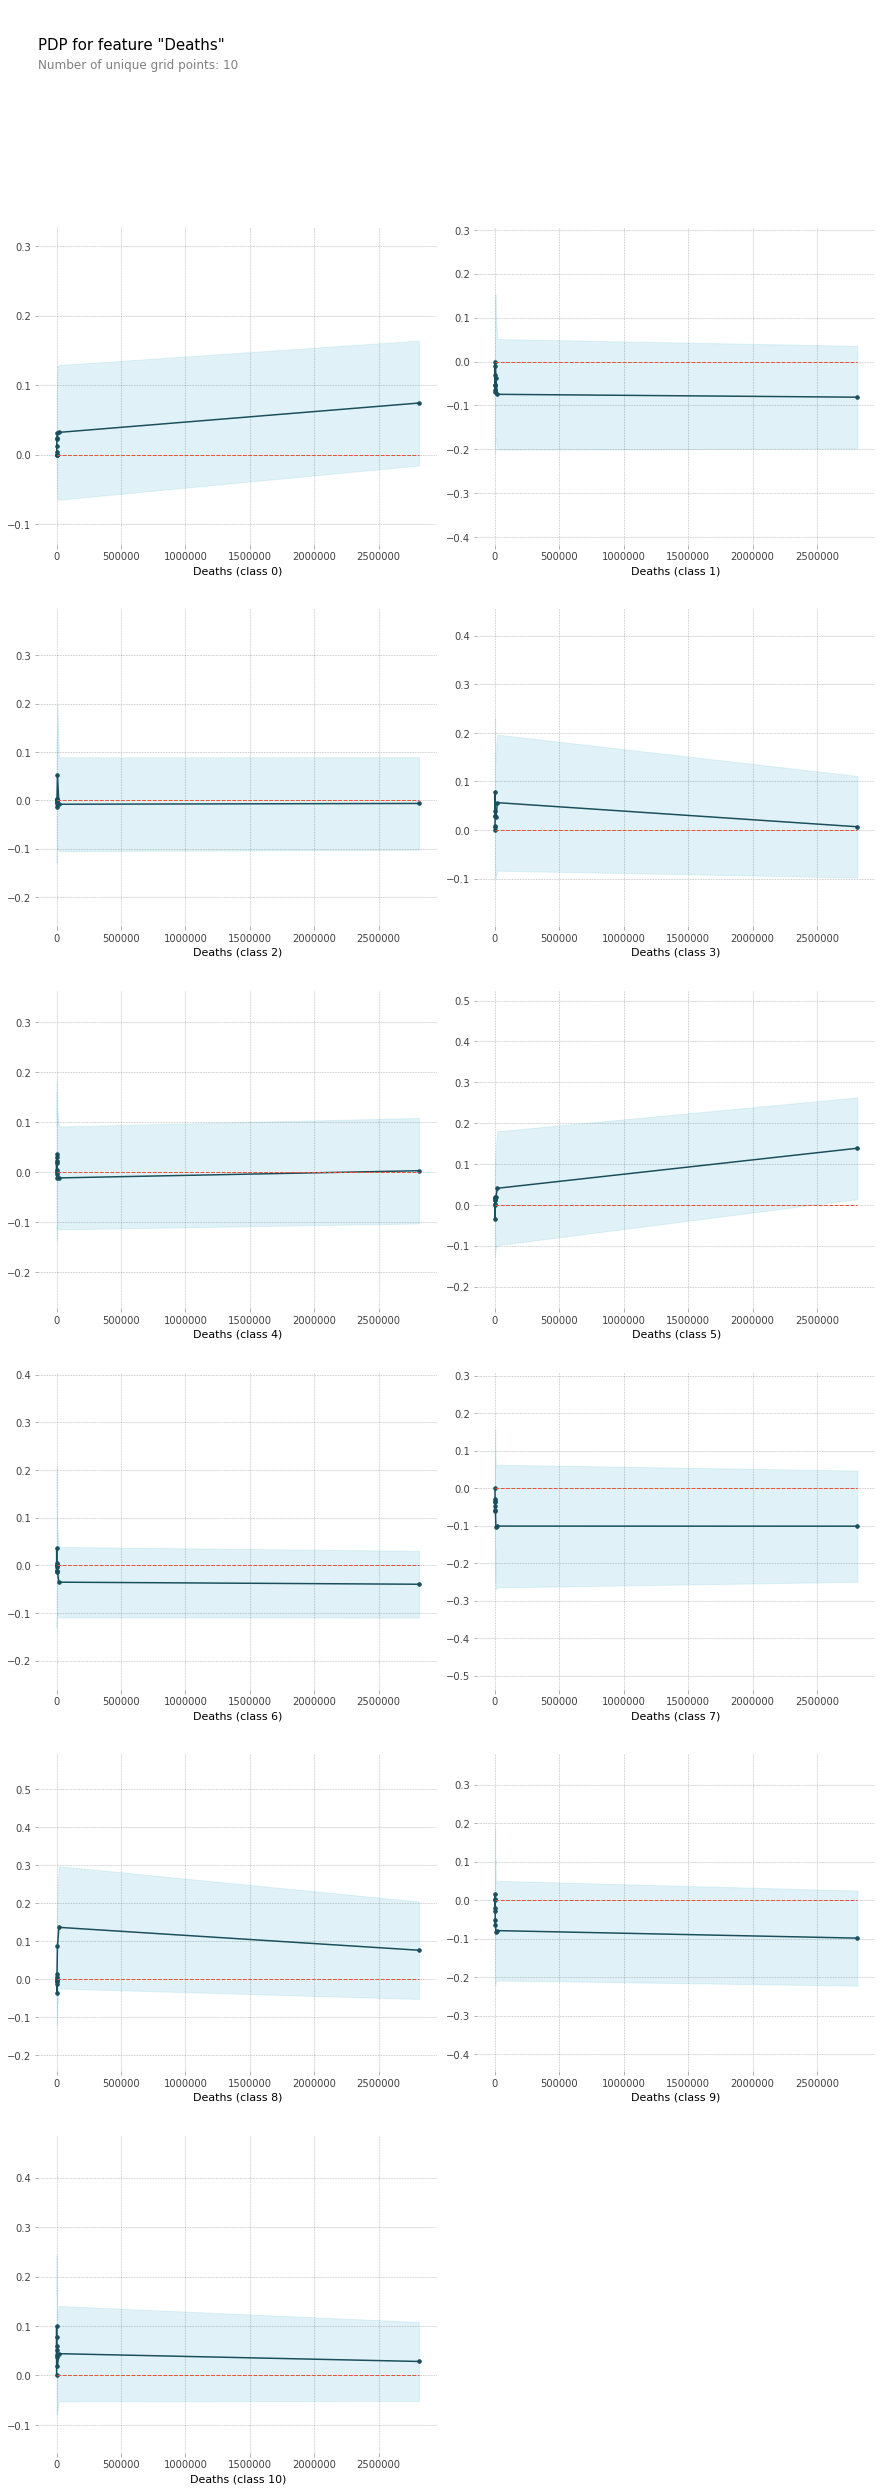

In [53]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Deaths'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

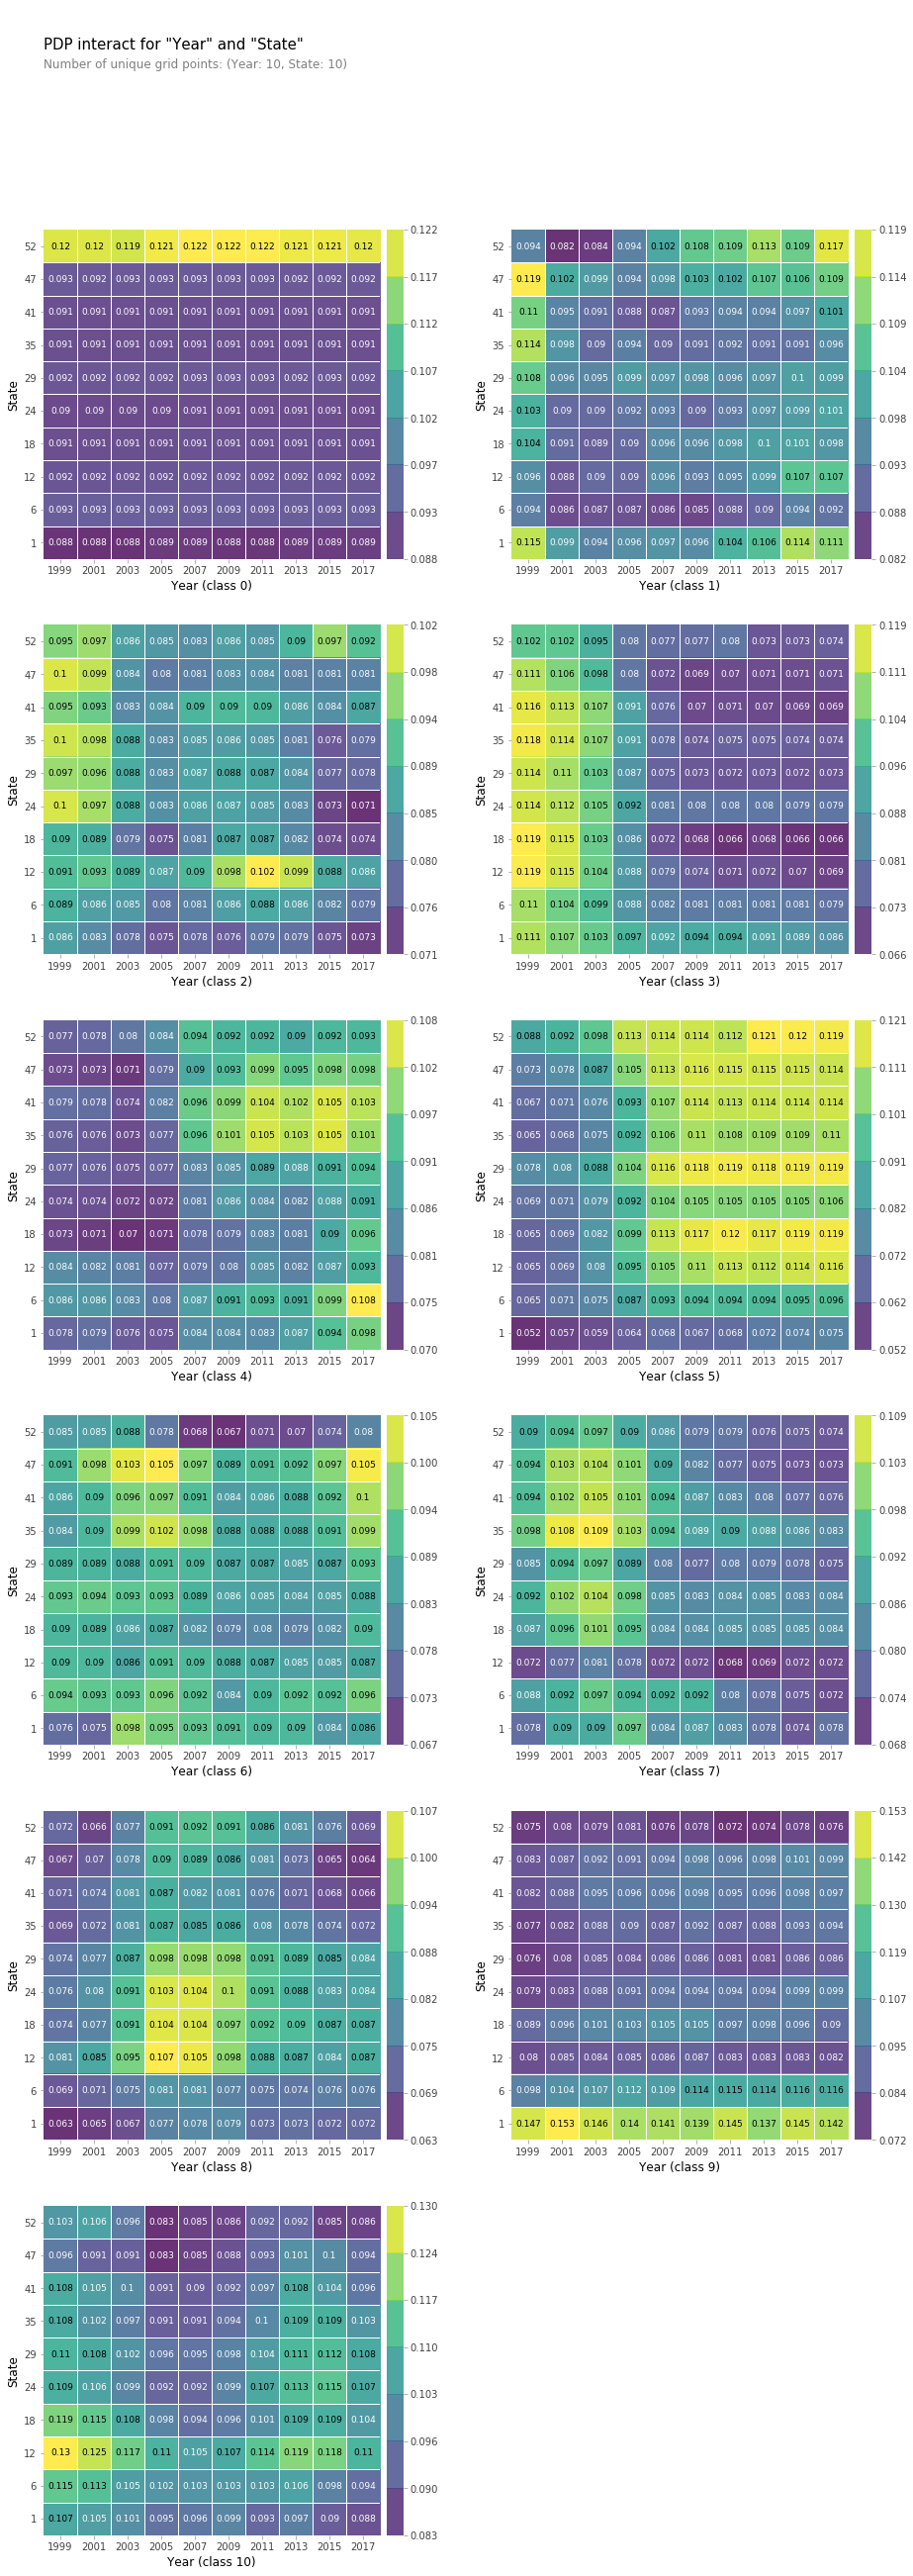

In [54]:
interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);